# Phase 1: Scraping

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

In [2]:
def save_result_data(setsu):
    url = 'https://soccer.yahoo.co.jp/jleague/schedule/j1/' + str(setsu) + '/all'
    html = urlopen(url)
    bsObj = BeautifulSoup(html, "html.parser")
    table = bsObj.findAll("table")[0]

    rows = table.findAll("tr")

    csvFile = open("result" + str(setsu) + ".csv", 'wt', newline = '', encoding = 'utf-8')
    writer = csv.writer(csvFile)

    try:
        for row in rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            writer.writerow(csvRow)
    finally:
        csvFile.close()

In [3]:
for setsu in range(1, 35):
    save_result_data(setsu)

# Phase 2: Preprocessing

In [4]:
df = []

In [5]:
for setsu in range(1, 35):
    df.append(pd.read_csv("result" + str(setsu) + ".csv"))

In [6]:
df[0]

,キックオフ,ホーム,試合状況,アウェイ,試合会場
0,2/23（金）20:00,\n鳥栖\n,\n1 - 1\n試合終了\nハイライト動画\n,\n神戸\n,ベアスタ
1,2/24（土）14:00,\nFC東京\n,\n1 - 1\n試合終了\nハイライト動画\n,\n浦和\n,味スタ
2,2/24（土）14:00,\n広島\n,\n1 - 0\n試合終了\nハイライト動画\n,\n札幌\n,Eスタ
3,2/24（土）14:30,\nG大阪\n,\n2 - 3\n試合終了\nハイライト動画\n,\n名古屋\n,吹田S
4,2/24（土）16:00,\n湘南\n,\n2 - 1\n試合終了\nハイライト動画\n,\n長崎\n,BMWス
5,2/25（日）13:00,\n仙台\n,\n1 - 0\n試合終了\nハイライト動画\n,\n柏\n,ユアスタ
6,2/25（日）13:00,\n清水\n,\n0 - 0\n試合終了\nハイライト動画\n,\n鹿島\n,アイスタ
7,2/25（日）15:30,\n磐田\n,\n0 - 3\n試合終了\nハイライト動画\n,\n川崎F\n,エコパ
8,2/25（日）16:00,\nC大阪\n,\n1 - 1\n試合終了\nハイライト動画\n,\n横浜FM\n,ヤンマー


In [7]:
result = pd.concat([df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7], df[8], df[9], 
           df[10], df[11], df[12], df[13], df[14], df[15], df[16], df[17], df[18], df[19], 
           df[20], df[21], df[22], df[23], df[24], df[25], df[26], df[27], df[28], df[29], 
           df[30], df[31], df[32], df[33]]).reset_index()

In [8]:
result['アウェイ'] = result['アウェイ'].str.replace('\n', '')
result['ホーム'] = result['ホーム'].str.replace('\n', '')
result['試合状況'] = result['試合状況'].str.replace('\n', '')
result['試合状況'] = result['試合状況'].str.replace('試合終了ハイライト動画', '')

In [9]:
result

,index,アウェイ,キックオフ,チケット,ホーム,試合会場,試合状況
0,0,神戸,2/23（金）20:00,NaN,鳥栖,ベアスタ,1 - 1
1,1,浦和,2/24（土）14:00,NaN,FC東京,味スタ,1 - 1
2,2,札幌,2/24（土）14:00,NaN,広島,Eスタ,1 - 0
3,3,名古屋,2/24（土）14:30,NaN,G大阪,吹田S,2 - 3
4,4,長崎,2/24（土）16:00,NaN,湘南,BMWス,2 - 1
5,5,柏,2/25（日）13:00,NaN,仙台,ユアスタ,1 - 0
6,6,鹿島,2/25（日）13:00,NaN,清水,アイスタ,0 - 0
7,7,川崎F,2/25（日）15:30,NaN,磐田,エコパ,0 - 3
8,8,横浜FM,2/25（日）16:00,NaN,C大阪,ヤンマー,1 - 1
9,0,湘南,3/2（金）19:00,NaN,川崎F,等々力,1 - 1


In [10]:
result['date'] = result['キックオフ'].str[:-8]

In [11]:
fin = result.query("試合状況!='                    -          '")
fin = fin[:258]
fin

,index,アウェイ,キックオフ,チケット,ホーム,試合会場,試合状況,date
0,0,神戸,2/23（金）20:00,NaN,鳥栖,ベアスタ,1 - 1,2/23
1,1,浦和,2/24（土）14:00,NaN,FC東京,味スタ,1 - 1,2/24
2,2,札幌,2/24（土）14:00,NaN,広島,Eスタ,1 - 0,2/24
3,3,名古屋,2/24（土）14:30,NaN,G大阪,吹田S,2 - 3,2/24
4,4,長崎,2/24（土）16:00,NaN,湘南,BMWス,2 - 1,2/24
5,5,柏,2/25（日）13:00,NaN,仙台,ユアスタ,1 - 0,2/25
6,6,鹿島,2/25（日）13:00,NaN,清水,アイスタ,0 - 0,2/25
7,7,川崎F,2/25（日）15:30,NaN,磐田,エコパ,0 - 3,2/25
8,8,横浜FM,2/25（日）16:00,NaN,C大阪,ヤンマー,1 - 1,2/25
9,0,湘南,3/2（金）19:00,NaN,川崎F,等々力,1 - 1,3/2


In [12]:
fin['away_score'] = fin['試合状況'].str[0]
fin['home_score'] = fin['試合状況'].str[4]

In [109]:
fin.head()

,index,アウェイ,キックオフ,チケット,ホーム,試合会場,試合状況,date,away_score,home_score,away_point,home_point
0,0,神戸,2/23（金）20:00,NaN,鳥栖,ベアスタ,1 - 1,2/23,1,1,1,1
1,1,浦和,2/24（土）14:00,NaN,FC東京,味スタ,1 - 1,2/24,1,1,1,1
2,2,札幌,2/24（土）14:00,NaN,広島,Eスタ,1 - 0,2/24,1,0,0,3
3,3,名古屋,2/24（土）14:30,NaN,G大阪,吹田S,2 - 3,2/24,2,3,3,0
4,4,長崎,2/24（土）16:00,NaN,湘南,BMWス,2 - 1,2/24,2,1,0,3


In [14]:
away_point = []
for i in range(len(fin)):
    tmp = fin.iloc[i]
    if tmp['away_score'] < tmp['home_score']:
        away_point.append(3)
    elif tmp['away_score'] == tmp['home_score']:
        away_point.append(1)
    else:
        away_point.append(0)

In [15]:
home_point = []
for i in range(len(fin)):
    tmp = fin.iloc[i]
    if tmp['away_score'] > tmp['home_score']:
        home_point.append(3)
    elif tmp['away_score'] == tmp['home_score']:
        home_point.append(1)
    else:
        home_point.append(0)

In [16]:
fin['away_point'] = away_point
fin['home_point'] = home_point

In [17]:
teams = []
dates = []
scores = []

for i in range(len(fin)):
    tmp = fin.iloc[i]
    
    teams.append(tmp['アウェイ'])
    teams.append(tmp['ホーム'])
    
    dates.append('2018年' + tmp['date'])
    dates.append('2018年' + tmp['date'])
    
    scores.append(tmp['away_point'])
    scores.append(tmp['home_point'])

In [18]:
res = pd.DataFrame({ 'dates' : dates,
                        'teams' : teams,
                        'scores' : scores })

In [19]:
res['dates'] = pd.to_datetime(res['dates'], format='%Y年%m/%d')

In [20]:
res

,dates,scores,teams
0,2018-02-23,1,神戸
1,2018-02-23,1,鳥栖
2,2018-02-24,1,浦和
3,2018-02-24,1,FC東京
4,2018-02-24,0,札幌
5,2018-02-24,3,広島
6,2018-02-24,3,名古屋
7,2018-02-24,0,G大阪
8,2018-02-24,0,長崎
9,2018-02-24,3,湘南


# Phase 3: Visualizing

In [86]:
team0 = res[res['teams'] == '川崎F']
team0 = team0.sort_values('dates')
team0['accum_scores'] = team0['scores'].cumsum()

In [87]:
team1 = res[res['teams'] == '広島']
team1 = team1.sort_values('dates')
team1['accum_scores'] = team1['scores'].cumsum()

In [88]:
team2 = res[res['teams'] == 'FC東京']
team2 = team2.sort_values('dates')
team2['accum_scores'] = team2['scores'].cumsum()

In [89]:
team3 = res[res['teams'] == '鹿島']
team3 = team3.sort_values('dates')
team3['accum_scores'] = team3['scores'].cumsum()

In [90]:
team4 = res[res['teams'] == '浦和']
team4 = team4.sort_values('dates')
team4['accum_scores'] = team4['scores'].cumsum()

In [91]:
team5 = res[res['teams'] == '札幌']
team5 = team5.sort_values('dates')
team5['accum_scores'] = team5['scores'].cumsum()

In [92]:
team6 = res[res['teams'] == '清水']
team6 = team6.sort_values('dates')
team6['accum_scores'] = team6['scores'].cumsum()

In [93]:
team7 = res[res['teams'] == '仙台']
team7 = team7.sort_values('dates')
team7['accum_scores'] = team7['scores'].cumsum()

In [94]:
team8 = res[res['teams'] == 'C大阪']
team8 = team8.sort_values('dates')
team8['accum_scores'] = team8['scores'].cumsum()

In [95]:
team9 = res[res['teams'] == 'G大阪']
team9 = team9.sort_values('dates')
team9['accum_scores'] = team9['scores'].cumsum()

In [96]:
team10 = res[res['teams'] == '横浜FM']
team10 = team10.sort_values('dates')
team10['accum_scores'] = team10['scores'].cumsum()

In [97]:
team11 = res[res['teams'] == '神戸']
team11 = team11.sort_values('dates')
team11['accum_scores'] = team11['scores'].cumsum()

In [98]:
team12 = res[res['teams'] == '湘南']
team12 = team12.sort_values('dates')
team12['accum_scores'] = team12['scores'].cumsum()

In [99]:
team13 = res[res['teams'] == '名古屋']
team13 = team13.sort_values('dates')
team13['accum_scores'] = team13['scores'].cumsum()

In [100]:
team14 = res[res['teams'] == '鳥栖']
team14 = team14.sort_values('dates')
team14['accum_scores'] = team14['scores'].cumsum()

In [101]:
team15 = res[res['teams'] == '柏']
team15 = team15.sort_values('dates')
team15['accum_scores'] = team15['scores'].cumsum()

In [102]:
team16 = res[res['teams'] == '磐田']
team16 = team16.sort_values('dates')
team16['accum_scores'] = team16['scores'].cumsum()

In [103]:
team17 = res[res['teams'] == '長崎']
team17 = team17.sort_values('dates')
team17['accum_scores'] = team17['scores'].cumsum()

In [104]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

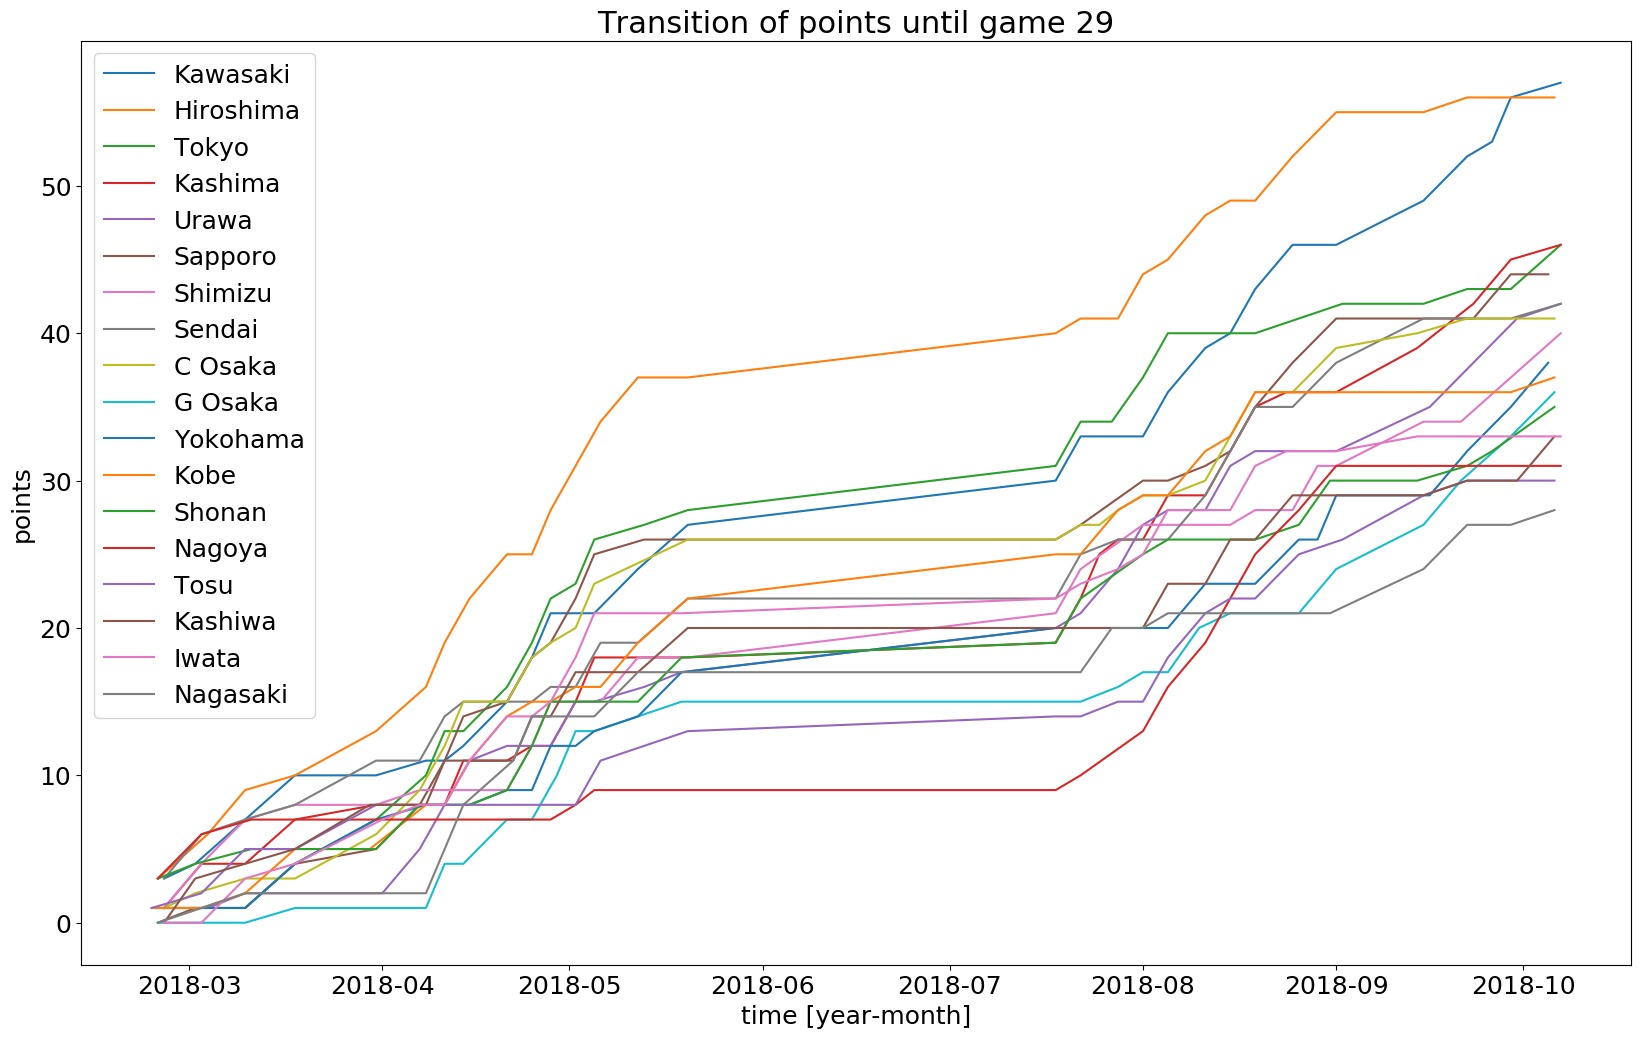

In [108]:
plt.style.use('default')
plt.figure(figsize=(20, 12))

plt.plot(team0['dates'], team0['accum_scores'], label='Kawasaki')
plt.plot(team1['dates'], team1['accum_scores'], label='Hiroshima')
plt.plot(team2['dates'], team2['accum_scores'], label='Tokyo')
plt.plot(team3['dates'], team3['accum_scores'], label='Kashima')
plt.plot(team4['dates'], team4['accum_scores'], label='Urawa')
plt.plot(team5['dates'], team5['accum_scores'], label='Sapporo')
plt.plot(team6['dates'], team6['accum_scores'], label='Shimizu')
plt.plot(team7['dates'], team7['accum_scores'], label='Sendai')
plt.plot(team8['dates'], team8['accum_scores'], label='C Osaka')
plt.plot(team9['dates'], team9['accum_scores'], label='G Osaka')
plt.plot(team10['dates'], team10['accum_scores'], label='Yokohama')
plt.plot(team11['dates'], team11['accum_scores'], label='Kobe')
plt.plot(team12['dates'], team12['accum_scores'], label='Shonan')
plt.plot(team13['dates'], team13['accum_scores'], label='Nagoya')
plt.plot(team14['dates'], team14['accum_scores'], label='Tosu')
plt.plot(team15['dates'], team15['accum_scores'], label='Kashiwa')
plt.plot(team16['dates'], team16['accum_scores'], label='Iwata')
plt.plot(team17['dates'], team17['accum_scores'], label='Nagasaki')

plt.rcParams["font.size"] = 18
plt.legend()
plt.tick_params(labelsize=18)
plt.xlabel("time [year-month]", fontsize=18)
plt.ylabel("points", fontsize=18)
plt.title("Transition of points until game 29", fontsize=22)